# Analysing tweets for political account

**This Notbook provides a basic insight into the Ghana's political twitter activities and the reactions to them**
Tweets from the flagbearer and running mates of the two most popular political parties in Ghana as well as tweets from their official twitter handles of where sampled. Tweets samples were dated as back as *May 1st* to *7th September* this year

## Importing Libraries and Datasets

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
os.chdir('C://Users/Aristocratic/Desktop/Hackathon Project/Optimized-Modified-GetOldTweets3-OMGOT/GetOldTweets3-0.0.10')
print('Libraries Imported')

Libraries Imported


In [4]:
#Importing datasets
df_nana = pd.read_csv('Nana Addo.csv')
df_npp = pd.read_csv('NPP_GH.csv')
df_bawumia = pd.read_csv('Bawumia.csv')
df_mahama = pd.read_csv('JM.csv')
df_jane = pd.read_csv('Prof Jane Naana.csv')
df_ndc = pd.read_csv('Official NDC.csv')

In [12]:
# Combining dataset to form one big dataframe
frames = [df_nana,df_npp,df_bawumia,df_mahama,df_jane,df_ndc]
df = pd.concat(frames)
df.shape

(1392, 12)

### Data Cleaning

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.columns

Index(['date', 'username', 'to', 'replies', 'retweets', 'favorites', 'text',
       'geo', 'mentions', 'hashtags', 'id', 'permalink'],
      dtype='object')

In [18]:
df.nunique()

date         1287
username        6
to             39
replies       214
retweets      329
favorites     699
text         1391
geo             0
mentions       71
hashtags      203
id           1392
permalink    1392
dtype: int64

In [19]:
df.isnull().sum()

date            0
username        0
to           1342
replies         0
retweets        0
favorites       0
text            0
geo          1392
mentions     1146
hashtags      511
id              0
permalink       0
dtype: int64

In [20]:
#dropping columns that have null values and those that will not be used in the analysis
df.drop(['to','geo','mentions','id','permalink'], axis = 1, inplace = True )
df.head()

,date,username,replies,retweets,favorites,text,hashtags
0,2020-09-04 07:56:53,NAkufoAddo,194,647,5708,pic.twitter.com/EVW0W8U8Cp,NaN
1,2020-09-02 08:43:38,NAkufoAddo,446,1421,10754,pic.twitter.com/bgQGfpzdoV,NaN
2,2020-09-01 14:17:16,NAkufoAddo,168,462,3895,#FinancialSectorCleanUppic.twitter.com/cPzDgYPBtt,#FinancialSectorCleanUppic
3,2020-09-01 06:00:11,NAkufoAddo,126,262,2475,#97DaysToVote #4MoreToDoMoreForYoupic.twitter....,#97DaysToVote #4MoreToDoMoreForYoupic
4,2020-09-01 01:54:45,NAkufoAddo,536,941,9574,We have cleaned the financial sector mess we i...,#FinancialSectorCleanUp


In [48]:
#Save check point to a csv file
df.to_csv('political_twitter_combined.csv', index= False)

## Reactions to Tweets

In [21]:
#Most reacted to political account
new_df = df.groupby('username').sum().sort_values('favorites', ascending=False)
new_df

,replies,retweets,favorites
username,,,
NAkufoAddo,29853,89980,637993
JDMahama,17343,32306,248775
NJOAgyemang,3917,17358,128098
NPP_GH,5425,24351,117244
OfficialNDCGh,6616,13924,98492
MBawumia,905,3085,17596


The table above details the public reactions to the political accounts we are monitoring. Now we will delve deeper by comparing them on indiviual levels. Thus **NPP** vs corresponding **NDC**.

## Head to Head Comparison
### HE Nana Addo vrs Ex Prez. Mahama

In [22]:
new_df.loc['NAkufoAddo':'JDMahama']

,replies,retweets,favorites
username,,,
NAkufoAddo,29853,89980,637993
JDMahama,17343,32306,248775


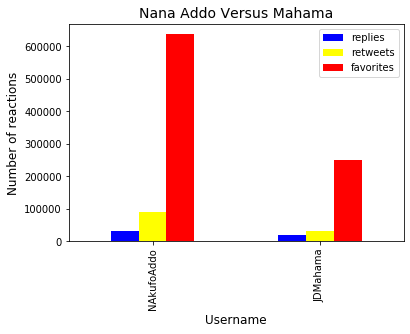

In [26]:
new_df.loc['NAkufoAddo':'JDMahama',:].plot(kind = 'bar', color=('blue','yellow','red'))
plt.title('Nana Addo Versus Mahama', fontsize= 14)
plt.xlabel('Username', fontsize = 12)
plt.ylabel('Number of reactions', fontsize= 12)

plt.show()

### VP Bawumia Vs Prof. Jane Naana

In [27]:
frames = [new_df.loc[['MBawumia']], new_df.loc[['NJOAgyemang']]]
new_df_b = pd.concat(frames)
new_df_b

,replies,retweets,favorites
username,,,
MBawumia,905,3085,17596
NJOAgyemang,3917,17358,128098


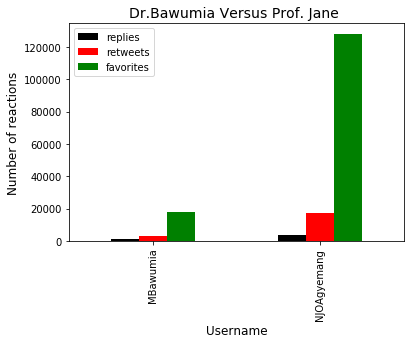

In [28]:
new_df_b.plot(kind = 'bar', color=['black','red','green'])
plt.title('Dr.Bawumia Versus Prof. Jane ', fontsize=14)
plt.xlabel('Username', fontsize=12)
plt.ylabel('Number of reactions',fontsize=12)

plt.show()

### NPP_Gh vrs Official_NDC

In [29]:
frames = [new_df.loc[['NPP_GH']], new_df.loc[['OfficialNDCGh']]]
new_df_c = pd.concat(frames)
new_df_c

,replies,retweets,favorites
username,,,
NPP_GH,5425,24351,117244
OfficialNDCGh,6616,13924,98492


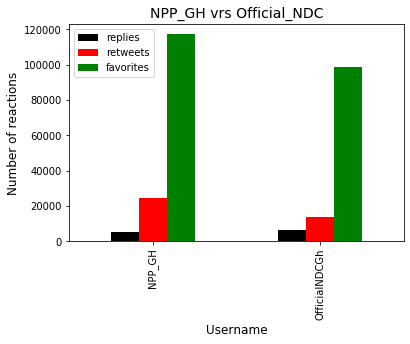

In [30]:
new_df_c.plot(kind = 'bar', color=['black','red','green'])
plt.title('NPP_GH vrs Official_NDC', fontsize=14)
plt.xlabel('Username',fontsize=12)
plt.ylabel('Number of reactions',fontsize=12)

plt.show()

### Time Series Graph
In this section, we will model a time series graph to help us ascertain how the twitter activites of the political parties are changing as election day draws nearer

In [31]:
df['date'] = pd.to_datetime(df['date'])
df['tweet_date'] = df.loc[:, 'date'].apply(lambda s: s.date())
df['tweet_year'] = df.loc[:, 'date'].apply(lambda s: s.year)
df['tweet_month'] = df.loc[:, 'date'].apply(lambda s: s.month_name())

In [32]:
subset = df[['tweet_date','username']]
subset = subset.sort_values('tweet_date')
time_series = subset['tweet_date'].value_counts().reset_index()
time_series.columns = ['Date', 'Counts']
time_series = time_series.sort_values('Date')
time_series['Cum Count'] = time_series['Counts'].cumsum()

fig = make_subplots(
    rows=1, 
    cols=1,
    subplot_titles=("Time series plot of number of tweets"))
df.sort_values('date', inplace=True)
fig.append_trace(go.Scatter(
    x=time_series['Date'],
    y=time_series['Cum Count'],
    name="All",
    mode='lines'),
    row=1, col=1)

fig.show()

## Word Cloud
**Word Cloud** provides information on the most popular word used in a particular passage. In this section, we will analyse text from tweets of accounts of *NPP* and *NDC* to get a fair idea of what they normally tweet about.

In [34]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
os.chdir('C:/Users/Aristocratic/Desktop/Hackathon Project/')

### NPP word cloud

In [35]:
new_df = df[(df['username']=='NAkufoAddo') | (df['username']=='NPP_GH') | (df['username']=='MBawumia')]

In [40]:
def color_func(word=None, font_size=None,position=None,orientation=None, font_path=None,random_state=None):
    h = int(240.0 * 255.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    #l = int(100.0 * float(random_state.randint(60, 120)) / 250)
    l = int(50.0 * 255.0 / 255.0)
    return 'hsl({}, {}%, {}%)'.format(h, s, l)

In [36]:
with open('npp_wc.txt','w') as f:
    for row in new_df.text:
        f.write(row)
    f.close()

In [37]:
npp_text = open('npp_wc.txt', 'r').read()
stopwords = set(STOPWORDS)
more_stopwords = ['pic', 'twitter', 'com']
for word in more_stopwords:
    stopwords.add(word)

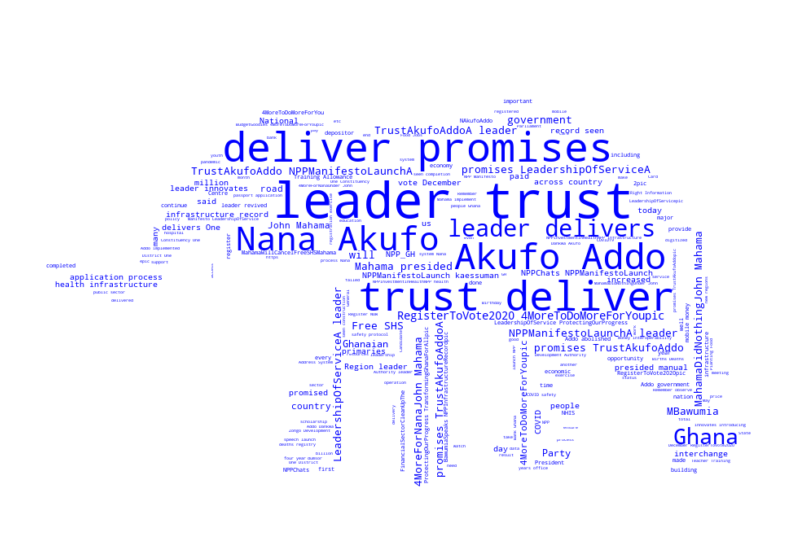

In [45]:
npp_logo = np.array(Image.open('elephant1.png'))
npp_wc = WordCloud(background_color='white',mask=npp_logo, stopwords=stopwords, 
                   color_func=color_func)
npp_wc.generate(npp_text)
#display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(npp_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### NDC Word Cloud

In [46]:
new_df = df[(df['username']=='JDMahama')|(df['username']=='NJOAgyemang')|(df['username']=='OfficialNDCGh')]

In [53]:
def color_func(word=None, font_size=None,position=None,orientation=None, font_path=None,random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 250)
    return 'hsl({}, {}%, {}%)'.format(h, s, l)

In [47]:
with open('ndc_wc.txt','w') as f:
    for row in new_df.text:
        try:
            f.write(row)
        except UnicodeEncodeError:
            pass
            
    f.close()

In [48]:
ndc_text = open('ndc_wc.txt','r').read()
stopwords = set(STOPWORDS)
more_stopwords = ['twitter','pic','com','tv','will','live']
for word in more_stopwords:
    stopwords.add(word)

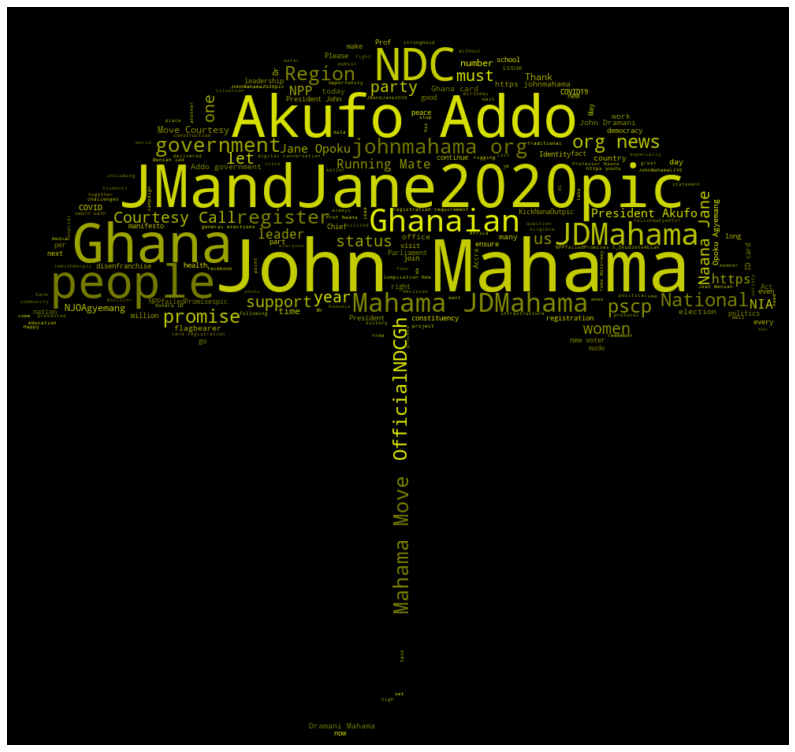

In [54]:
ndc_mask = np.array(Image.open('12950340.jpg'))
ndc_wc = WordCloud(background_color='black',mask=ndc_mask, stopwords = stopwords, color_func=color_func)
ndc_wc.generate(ndc_text)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(ndc_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Getting Sentiment of Users

In [9]:
import re
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob

### Nana Akuffo Addo

In [5]:
df_nana.drop(['to','geo','mentions','id','permalink'], axis=1,inplace=True)
df_nana.head()

,date,username,replies,retweets,favorites,text,hashtags
0,2020-09-04 07:56:53,NAkufoAddo,194,647,5708,pic.twitter.com/EVW0W8U8Cp,NaN
1,2020-09-02 08:43:38,NAkufoAddo,446,1421,10754,pic.twitter.com/bgQGfpzdoV,NaN
2,2020-09-01 14:17:16,NAkufoAddo,168,462,3895,#FinancialSectorCleanUppic.twitter.com/cPzDgYPBtt,#FinancialSectorCleanUppic
3,2020-09-01 06:00:11,NAkufoAddo,126,262,2475,#97DaysToVote #4MoreToDoMoreForYoupic.twitter....,#97DaysToVote #4MoreToDoMoreForYoupic
4,2020-09-01 01:54:45,NAkufoAddo,536,941,9574,We have cleaned the financial sector mess we i...,#FinancialSectorCleanUp


In [10]:
def clean_tweet(tweet):
    review = re.sub('[^a-zA-Z]', ' ', tweet) #replaces symbols, numbers with space
    review = review.lower()
    #review = review.split()
    cleaned_tokens = []
    for word, tag in pos_tag(word_tokenize(review)):
        stop_words = stopwords.words('english')
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatizer = WordNetLemmatizer()
        word = lemmatizer.lemmatize(word, pos)
        
        if len(word) > 0 and word not in string.punctuation and word.lower() not in stop_words:
            cleaned_tokens.append(word.lower())
    return ' '.join(cleaned_tokens)

def get_tweet_sentiment(tweet): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
def main():
    global sampled_tweets
    sampled_tweets = []
    for index,row in df_nana[['text']].iterrows():
        parsed_tweet = {}
        parsed_tweet['text'] = row['text']
        parsed_tweet['sentiment'] = get_tweet_sentiment(row['text'])
        
        sampled_tweets.append(parsed_tweet) 
if __name__ == "__main__": 
    # calling main function 
    main() 

103


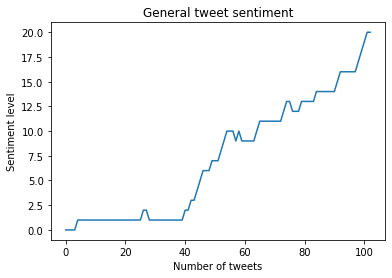

In [11]:
df2 = pd.DataFrame.from_dict(sampled_tweets)
df2.head()
def check(sentiment):
    if sentiment == "positive":
        return 1
    elif sentiment == "negative":
        return -1
    else:
        return 0

counter_variable = 0
y = []
for index,row in df2.iterrows():
    counter_variable  = counter_variable + check(row[1])
    y.append(counter_variable)

print(len(df2))
x= range(len(df2))
plt.plot(x,y)
plt.title('General tweet sentiment')
plt.xlabel('Number of tweets')
plt.ylabel('Sentiment level')
plt.show()

###  M Bawumia

In [12]:
df_bawumia.drop(['to','geo','mentions','id','permalink'], axis=1,inplace=True)
df_bawumia.head()

,date,username,replies,retweets,favorites,text,hashtags
0,2020-09-05 13:12:39,MBawumia,0,24,97,The interchange when completed will improve in...,NaN
1,2020-09-05 13:12:38,MBawumia,13,62,356,I started day-3 of my Northern regional tour w...,NaN
2,2020-09-02 22:55:36,MBawumia,3,14,76,"The NRAS will be seeded with GH¢100 million, t...",NaN
3,2020-09-02 22:55:36,MBawumia,2,14,102,... to President @NAkufoAddo and the @NPP_GH f...,NaN
4,2020-09-02 22:55:35,MBawumia,21,65,358,"The issues of housing and cost of rent, as wel...",NaN


In [13]:
def clean_tweet(tweet):
    review = re.sub('[^a-zA-Z]', ' ', tweet) #replaces symbols, numbers with space
    review = review.lower()
    #review = review.split()
    cleaned_tokens = []
    for word, tag in pos_tag(word_tokenize(review)):
        stop_words = stopwords.words('english')
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatizer = WordNetLemmatizer()
        word = lemmatizer.lemmatize(word, pos)
        
        if len(word) > 0 and word not in string.punctuation and word.lower() not in stop_words:
            cleaned_tokens.append(word.lower())
    return ' '.join(cleaned_tokens)

def get_tweet_sentiment(tweet): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
def main():
    global sampled_tweets
    sampled_tweets = []
    for index,row in df_bawumia[['text']].iterrows():
        parsed_tweet = {}
        parsed_tweet['text'] = row['text']
        parsed_tweet['sentiment'] = get_tweet_sentiment(row['text'])
        
        sampled_tweets.append(parsed_tweet) 
if __name__ == "__main__": 
    # calling main function 
    main() 

55


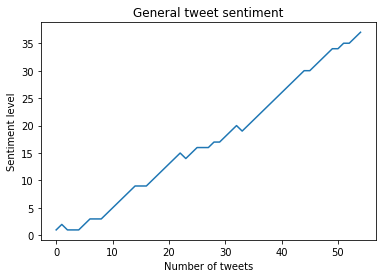

In [14]:
df2 = pd.DataFrame.from_dict(sampled_tweets)
df2.head()
def check(sentiment):
    if sentiment == "positive":
        return 1
    elif sentiment == "negative":
        return -1
    else:
        return 0

counter_variable = 0
y = []
for index,row in df2.iterrows():
    counter_variable  = counter_variable + check(row[1])
    y.append(counter_variable)

print(len(df2))
x= range(len(df2))
plt.plot(x,y)
plt.title('General tweet sentiment')
plt.xlabel('Number of tweets')
plt.ylabel('Sentiment level')

plt.show()

## JD Mahama

In [15]:
df_mahama.drop(['to','geo','mentions','id','permalink'], axis=1,inplace=True)
df_mahama.head()

,date,username,replies,retweets,favorites,text,hashtags
0,2020-09-05 14:21:57,JDMahama,119,250,1469,#NDCmanifesto #JohnMahama2020 #JMandJane2020pi...,#NDCmanifesto #JohnMahama2020 #JMandJane2020pic
1,2020-09-05 08:13:51,JDMahama,27,107,561,An interview with John Mahama | Flagbearer of ...,NaN
2,2020-09-05 08:06:36,JDMahama,14,58,408,An interview with John Mahama | Flagbearer of ...,NaN
3,2020-09-04 20:15:23,JDMahama,9,56,319,John Mahama on the move | Courtesy call on Lam...,NaN
4,2020-09-04 17:15:33,JDMahama,9,49,305,John Mahama on the move | Courtesy call on Ull...,NaN


In [16]:
def clean_tweet(tweet):
    review = re.sub('[^a-zA-Z]', ' ', tweet) #replaces symbols, numbers with space
    review = review.lower()
    #review = review.split()
    cleaned_tokens = []
    for word, tag in pos_tag(word_tokenize(review)):
        stop_words = stopwords.words('english')
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatizer = WordNetLemmatizer()
        word = lemmatizer.lemmatize(word, pos)
        
        if len(word) > 0 and word not in string.punctuation and word.lower() not in stop_words:
            cleaned_tokens.append(word.lower())
    return ' '.join(cleaned_tokens)

def get_tweet_sentiment(tweet): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
def main():
    global sampled_tweets
    sampled_tweets = []
    for index,row in df_mahama[['text']].iterrows():
        parsed_tweet = {}
        parsed_tweet['text'] = row['text']
        parsed_tweet['sentiment'] = get_tweet_sentiment(row['text'])
        
        sampled_tweets.append(parsed_tweet) 
if __name__ == "__main__": 
    # calling main function 
    main() 

135


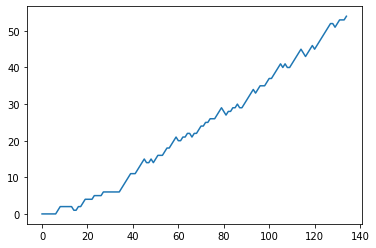

In [69]:
df2 = pd.DataFrame.from_dict(sampled_tweets)
df2.head()
def check(sentiment):
    if sentiment == "positive":
        return 1
    elif sentiment == "negative":
        return -1
    else:
        return 0

counter_variable = 0
y = []
for index,row in df2.iterrows():
    counter_variable  = counter_variable + check(row[1])
    y.append(counter_variable)

print(len(df2))
x= range(len(df2))
plt.plot(x,y)
plt.title('General tweet sentiment')
plt.xlabel('Number of tweets')
plt.ylabel('Sentiment level')

plt.show()

## Prof Jane Naana

In [17]:
df_jane.drop(['to','geo','mentions','id','permalink'], axis=1,inplace=True)
df_jane.head()

,date,username,replies,retweets,favorites,text,hashtags
0,2020-09-06 11:01:10,NJOAgyemang,14,112,640,#JMandJane2020pic.twitter.com/yhNjdDgkpd,#JMandJane2020pic
1,2020-09-05 16:34:36,NJOAgyemang,16,129,805,NDC is opposed to the Public University Bill. ...,#JMandJane2020pic
2,2020-09-05 15:13:42,NJOAgyemang,13,72,450,#JMandJane2020pic.twitter.com/k9g9e2RvWa,#JMandJane2020pic
3,2020-09-05 11:28:32,NJOAgyemang,16,103,732,It’s our time as women. We must take advantage...,#JMandJane2020pic
4,2020-09-04 21:48:48,NJOAgyemang,78,224,1428,My convoy has not been involved in an accident...,#JMandJane2020


In [18]:
def clean_tweet(tweet):
    review = re.sub('[^a-zA-Z]', ' ', tweet) #replaces symbols, numbers with space
    review = review.lower()
    #review = review.split()
    cleaned_tokens = []
    for word, tag in pos_tag(word_tokenize(review)):
        stop_words = stopwords.words('english')
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatizer = WordNetLemmatizer()
        word = lemmatizer.lemmatize(word, pos)
        
        if len(word) > 0 and word not in string.punctuation and word.lower() not in stop_words:
            cleaned_tokens.append(word.lower())
    return ' '.join(cleaned_tokens)

def get_tweet_sentiment(tweet): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
def main():
    global sampled_tweets
    sampled_tweets = []
    for index,row in df_jane[['text']].iterrows():
        parsed_tweet = {}
        parsed_tweet['text'] = row['text']
        parsed_tweet['sentiment'] = get_tweet_sentiment(row['text'])
        
        sampled_tweets.append(parsed_tweet) 
if __name__ == "__main__": 
    # calling main function 
    main() 

91


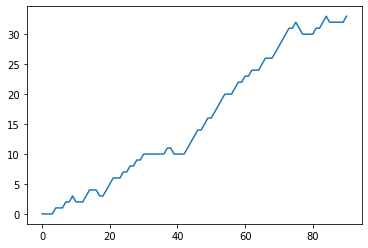

In [72]:
df2 = pd.DataFrame.from_dict(sampled_tweets)
df2.head()
def check(sentiment):
    if sentiment == "positive":
        return 1
    elif sentiment == "negative":
        return -1
    else:
        return 0

counter_variable = 0
y = []
for index,row in df2.iterrows():
    counter_variable  = counter_variable + check(row[1])
    y.append(counter_variable)

print(len(df2))
x= range(len(df2))
plt.plot(x,y)
plt.title('General tweet sentiment')
plt.xlabel('Number of tweets')
plt.ylabel('Sentiment level')

plt.show()